## Import Libraries

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pylab
%pip install seaborn
%pip install statsmodels
%pip install scikit-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: statsmodels in c:\users\edwin\appdata\local\programs\python\python310\lib\site-packages (0.13.5)




[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [250]:
%pip install pmdarima

     -------------------------------------- 568.9/568.9 kB 4.5 MB/s eta 0:00:00
     ------------------------------------- 986.3/986.3 kB 10.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime


%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [3]:
import sklearn.linear_model
import sklearn.metrics


In [4]:
import sklearn.model_selection
import sklearn.ensemble

## Data Import

In [5]:
df = pd.read_pickle('df.pickle')

In [6]:
df[df['week_id']==11609]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw
5646748,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,NaN,8.26,201612
5646749,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,NaN,3.97,201612
5646750,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,NaN,2.97,201612
5646751,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,NaN,4.64,201612
5646752,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,NaN,2.88,201612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28,201613


## Creation of DataFrames

Plan:  
1 DF Wochentag und Monat  
1 DF Durchschnittlicher Preis, Kategorie Wochentag und Event_type, Snap  
1 DF Prognose der Sales je Kategorie mit Durchschnittlichem Preis, Kategorie Wochentag und Event_type, Snap

### Set Datatypes

In [7]:

df['dayofweek'] = df['date'].dt.dayofweek.astype('category')
df['month'] = df['date'].dt.month.astype('category')
df['weekofyear'] = df['date'].dt.weekofyear.astype('category')
df['dayofmonth'] = df['date'].dt.day.astype('category')
df

C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\2484330580.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear.astype('category')


,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28,201613,3,3,13,31


In [8]:
df.dtypes

date            datetime64[ns]
week_id                  int64
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap                     int64
item_id                 object
dept_id                 object
cat_id                  object
sales                  float64
price                  float64
yearcw                  object
dayofweek             category
month                 category
weekofyear            category
dayofmonth            category
dtype: object

In [9]:
df[['dayofweek','month','weekofyear','dayofmonth','yearcw']] = df[['dayofweek','month','weekofyear','dayofmonth','yearcw']].astype('int')

In [10]:
df['snap'] = df['snap'].astype(bool)

In [11]:
df.set_index('date', inplace = True)

In [12]:
df.sort_index(axis = 0, ascending = True, inplace = True)

In [13]:
df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth
date,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31


### Creation Data Frame Simple 

In [14]:
df_simple = df[['dayofweek','month','sales']].groupby(by=df.index).agg({'sales':'sum','dayofweek':'mean','month':'mean'})
df_simple[['dayofweek','month']] = df_simple[['dayofweek','month']].astype('category')

In [15]:
df_simple_past = df_simple[df_simple.index<'2016-03-01']
df_simple_future = df_simple[df_simple.index>='2016-03-01']
df_simple_future.drop(columns='sales',inplace=True)
X_simple = df_simple_past.drop(columns='sales')
y_simple = df_simple_past['sales']


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\1969392478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple_future.drop(columns='sales',inplace=True)


### Creation Data Frame Medium
1 DF Durchschnittlicher Preis, Kategorie Wochentag und Event_type, Snap

In [16]:
df.event_type_1 = pd.Categorical(df.event_type_1)

In [17]:
df.dtypes

week_id            int64
event_name_1      object
event_type_1    category
event_name_2      object
event_type_2      object
snap                bool
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw             int32
dayofweek          int32
month              int32
weekofyear         int32
dayofmonth         int32
dtype: object

In [18]:
df['event_code'] = df.event_type_1.cat.codes

In [19]:
df['event_type_1'].unique()

[NaN, 'Religious', 'Cultural', 'National', 'Sporting']
Categories (4, object): ['Cultural', 'National', 'Religious', 'Sporting']

In [20]:
df['event_code'].unique()

array([-1,  2,  0,  1,  3], dtype=int8)

In [21]:
df[df['event_type_1']=='Religious']

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,4.34,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201612,3,3,12,24,2
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.68,201612,3,3,12,24,2
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201612,3,3,12,24,2


NaN = -1 ; Religious = 2 ; Cultural = 0 ; National = 1 ; Sporting = 3 

In [22]:
df.dtypes

week_id            int64
event_name_1      object
event_type_1    category
event_name_2      object
event_type_2      object
snap                bool
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw             int32
dayofweek          int32
month              int32
weekofyear         int32
dayofmonth         int32
event_code          int8
dtype: object

In [23]:
df[['event_code']] = df[['event_code']].astype('int')

In [24]:
df_medium = df[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_medium[['dayofweek','month','event_code','snap']] = df_medium[['dayofweek','month','event_code','snap']].astype('category')

In [25]:
df_medium_past = df_medium[df_medium.index<'2016-03-01']
df_medium_future = df_medium[df_medium.index>='2016-03-01']
df_medium_future.drop(columns='sales',inplace=True)
X_medium = df_medium_past.drop(columns='sales')
y_medium = df_medium_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\4193895854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_future.drop(columns='sales',inplace=True)


### Expansion Data Frame Medium

- Sales Shift
- Trendvariable
- 

In [186]:
df_medium_exp = df_medium.copy()
df_medium_exp['price_change_day'] = df_medium['price'].diff()
df_medium_exp['price_change_week'] = df_medium['price'].diff(periods=7)
df_medium_exp['snap_since'] = df_medium.groupby((df_medium['snap'] == 1).cumsum()).cumcount()
#df_medium_exp['snap_until'] = df_medium.groupby((df_medium['snap'] == 1).cumsum()).cumcount(ascending=False)
#df_medium_exp['snap_first_last_day'] = df_medium['snap'].diff()
df_medium_exp = df_medium_exp.fillna(0)
df_medium_exp.head(60)

,sales,dayofweek,month,price,event_code,snap,price_change_day,price_change_week,snap_since
date,,,,,,,,,
2011-03-01,2549.0,1.0,3.0,0.028194,-1.0,1.0,0.000000,0.000000,0
2011-03-02,2559.0,2.0,3.0,0.028194,-1.0,1.0,0.000000,0.000000,0
2011-03-03,2568.0,3.0,3.0,0.028194,-1.0,1.0,0.000000,0.000000,0
2011-03-04,2978.0,4.0,3.0,0.028194,-1.0,1.0,0.000000,0.000000,0
2011-03-05,4096.0,5.0,3.0,0.000000,-1.0,1.0,-0.028194,0.000000,0
2011-03-06,4832.0,6.0,3.0,0.000000,-1.0,1.0,0.000000,0.000000,0
2011-03-07,3138.0,0.0,3.0,0.000000,-1.0,1.0,0.000000,0.000000,0
2011-03-08,2997.0,1.0,3.0,0.000000,-1.0,1.0,0.000000,-0.028194,0
2011-03-09,2772.0,2.0,3.0,0.000000,2.0,1.0,0.000000,-0.028194,0


In [187]:
df_medium_exp_past = df_medium_exp[df_medium_exp.index<'2016-03-01']
df_medium_exp_future = df_medium_exp[df_medium_exp.index>='2016-03-01']
df_medium_exp_future.drop(columns='sales',inplace=True)
X_medium_exp = df_medium_exp_past.drop(columns='sales')
y_medium_exp = df_medium_exp_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\24288650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_exp_future.drop(columns='sales',inplace=True)


### Creation Data Frame Complex
1 DF Prognose der Sales je Kategorie mit Durchschnittlichem Preis, Kategorie Wochentag und Event_type, Snap

In [26]:
df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [27]:
df_hobbies = df[df['cat_id']=='HOBBIES']
df_hobbies

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_145,HOBBIES_2,HOBBIES,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_146,HOBBIES_2,HOBBIES,NaN,1.97,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_147,HOBBIES_2,HOBBIES,NaN,0.97,201613,3,3,13,31,-1


In [28]:
df_household = df[df['cat_id']=='HOUSEHOLD']
df_household

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,0.0,6.32,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,0.0,6.32,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_003,HOUSEHOLD_1,HOUSEHOLD,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,0.0,1.98,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,0.0,10.72,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_512,HOUSEHOLD_2,HOUSEHOLD,NaN,3.97,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_513,HOUSEHOLD_2,HOUSEHOLD,NaN,2.78,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,NaN,19.54,201613,3,3,13,31,-1


In [29]:
df_foods = df[df['cat_id']=='FOODS']
df_foods

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_001,FOODS_1,FOODS,2.0,2.00,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_002,FOODS_1,FOODS,1.0,7.88,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_003,FOODS_1,FOODS,0.0,2.88,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_004,FOODS_1,FOODS,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_005,FOODS_1,FOODS,0.0,2.94,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31,-1


In [30]:
df_hobbies = df_hobbies[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_hobbies.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_hobbies[['dayofweek','month','event_code','snap']] = df_hobbies[['dayofweek','month','event_code','snap']].astype('category')
df_hobbies

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,230.0,1.0,3.0,4.434672,-1.0,1.0
2011-03-02,197.0,2.0,3.0,4.434672,-1.0,1.0
2011-03-03,168.0,3.0,3.0,4.434672,-1.0,1.0
2011-03-04,193.0,4.0,3.0,4.434672,-1.0,1.0
2011-03-05,300.0,5.0,3.0,4.425600,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,5.571487,0.0,0.0
2016-03-28,0.0,0.0,3.0,5.571487,-1.0,0.0
2016-03-29,0.0,1.0,3.0,5.571487,-1.0,0.0


In [31]:
df_hobbies_past = df_hobbies[df_hobbies.index<'2016-03-01']
df_hobbies_future = df_hobbies[df_hobbies.index>='2016-03-01']
df_hobbies_future.drop(columns='sales',inplace=True)
X_hobbies = df_hobbies_past.drop(columns='sales')
y_hobbies = df_hobbies_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\329928890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hobbies_future.drop(columns='sales',inplace=True)


In [32]:
df_household = df_household[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_household.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_household[['dayofweek','month','event_code','snap']] = df_household[['dayofweek','month','event_code','snap']].astype('category')
df_household

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,423.0,1.0,3.0,5.566356,-1.0,1.0
2011-03-02,397.0,2.0,3.0,5.566356,-1.0,1.0
2011-03-03,416.0,3.0,3.0,5.566356,-1.0,1.0
2011-03-04,416.0,4.0,3.0,5.566356,-1.0,1.0
2011-03-05,573.0,5.0,3.0,5.571455,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,5.477316,0.0,0.0
2016-03-28,0.0,0.0,3.0,5.477316,-1.0,0.0
2016-03-29,0.0,1.0,3.0,5.477316,-1.0,0.0


In [33]:
df_household_past = df_household[df_household.index<'2016-03-01']
df_household_future = df_household[df_household.index>='2016-03-01']
df_household_future.drop(columns='sales',inplace=True)
X_household = df_household_past.drop(columns='sales')
y_household = df_household_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\3147528750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_household_future.drop(columns='sales',inplace=True)


In [34]:
df_foods = df_foods[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_foods.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_foods[['dayofweek','month','event_code','snap']] = df_foods[['dayofweek','month','event_code','snap']].astype('category')
df_foods

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,1896.0,1.0,3.0,3.125868,-1.0,1.0
2011-03-02,1965.0,2.0,3.0,3.125868,-1.0,1.0
2011-03-03,1984.0,3.0,3.0,3.125868,-1.0,1.0
2011-03-04,2369.0,4.0,3.0,3.125868,-1.0,1.0
2011-03-05,3223.0,5.0,3.0,3.111022,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,3.344823,0.0,0.0
2016-03-28,0.0,0.0,3.0,3.344823,-1.0,0.0
2016-03-29,0.0,1.0,3.0,3.344823,-1.0,0.0


In [35]:
df_foods_past = df_foods[df_foods.index<'2016-03-01']
df_foods_future = df_foods[df_foods.index>='2016-03-01']
df_foods_future.drop(columns='sales',inplace=True)
X_foods = df_foods_past.drop(columns='sales')
y_foods = df_foods_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\2018936748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foods_future.drop(columns='sales',inplace=True)


## Data Exploration II

<AxesSubplot: xlabel='event_code', ylabel='sales'>

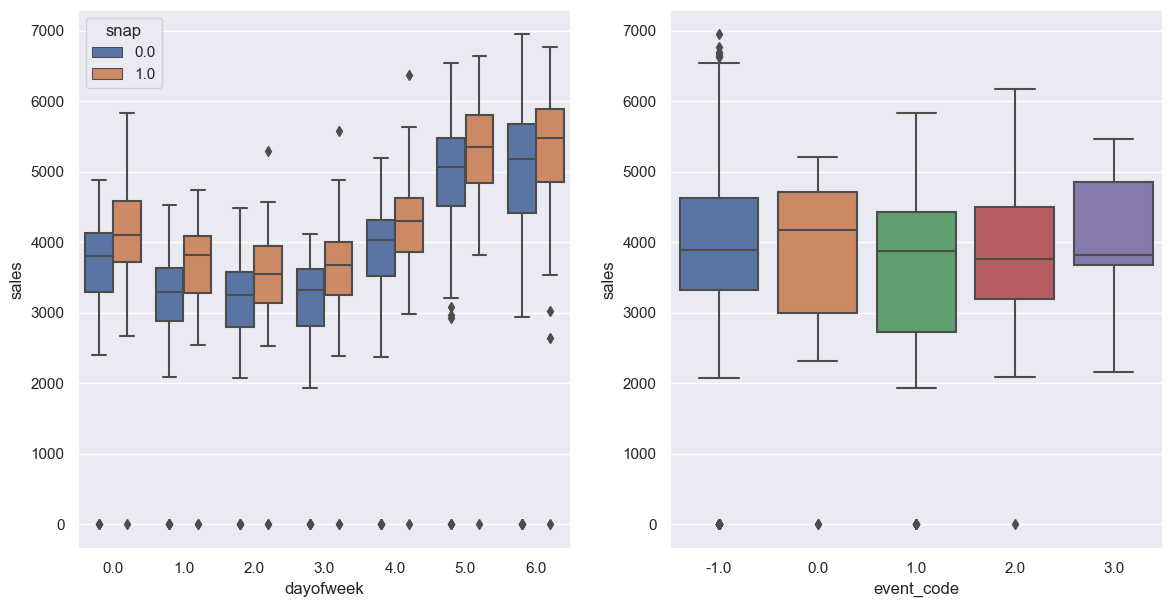

In [36]:
rows, cols = 1, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'dayofweek', y = "sales", hue = 'snap', data = df_medium, ax = axs[0])
sns.boxplot(x = 'event_code', y = "sales", data = df_medium, ax = axs[1])


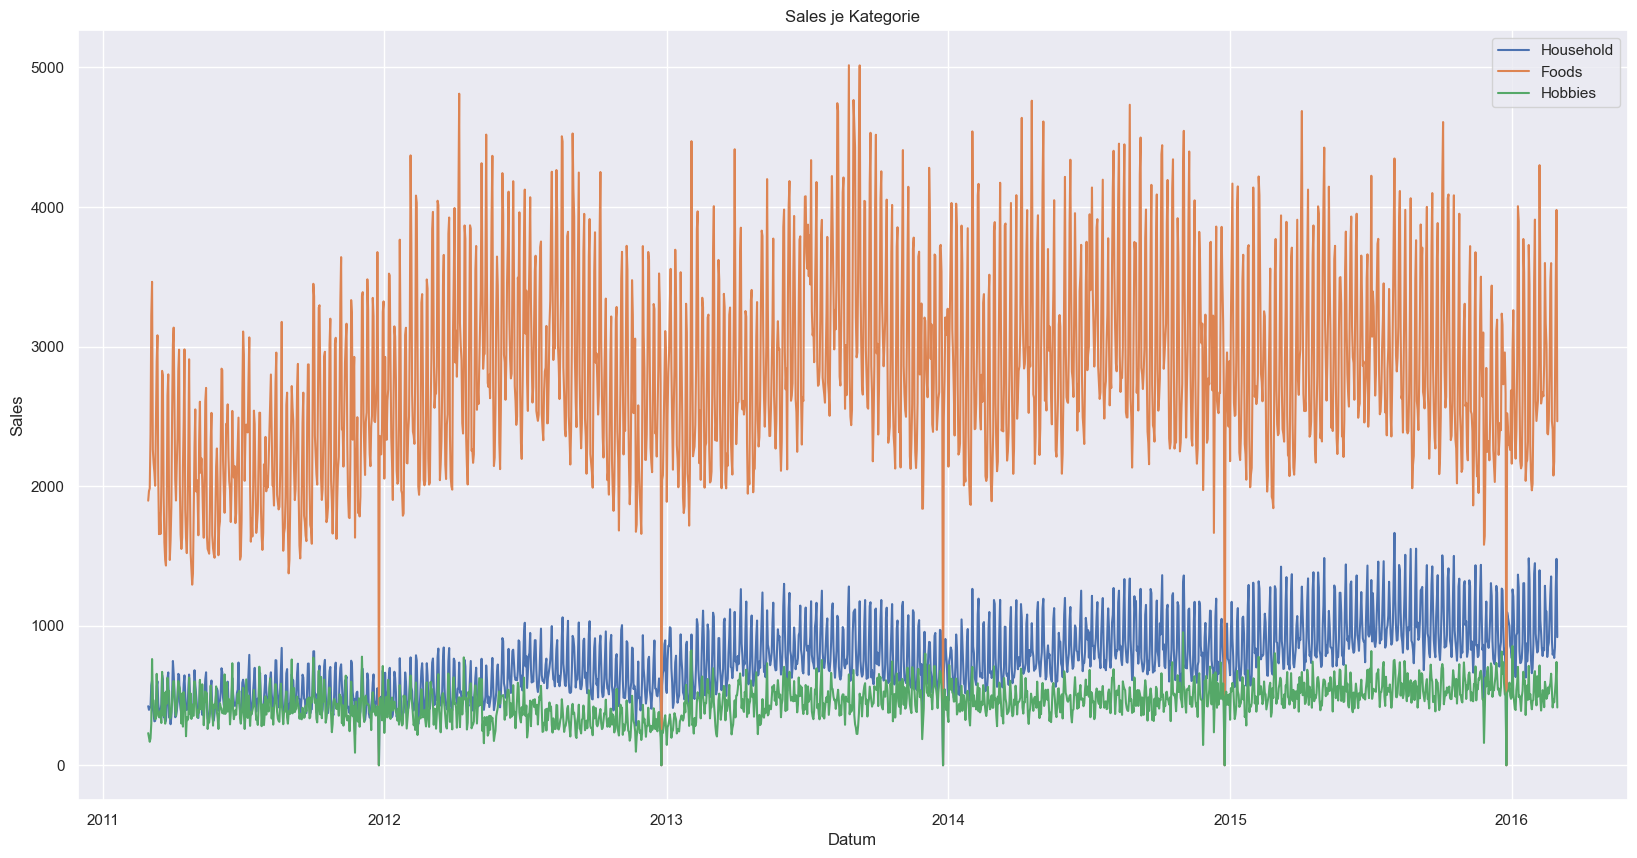

In [37]:
plt.plot(df_household_past.index,df_household_past['sales'],label="Household")
plt.plot(df_foods_past.index,df_foods_past['sales'],label="Foods")
plt.plot(df_hobbies_past.index,df_hobbies_past['sales'],label="Hobbies")
plt.title('Sales je Kategorie')
plt.xlabel("Datum")
plt.ylabel("Sales")
plt.legend(loc='upper right')
plt.show()

## Modellbildung

### Random Forest Regressor (Simple DF)

In [38]:
df_simple

,sales,dayofweek,month
date,,,
2011-03-01,2549.0,1.0,3.0
2011-03-02,2559.0,2.0,3.0
2011-03-03,2568.0,3.0,3.0
2011-03-04,2978.0,4.0,3.0
2011-03-05,4096.0,5.0,3.0
...,...,...,...
2016-03-27,0.0,6.0,3.0
2016-03-28,0.0,0.0,3.0
2016-03-29,0.0,1.0,3.0


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_simple = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=31, shuffle = False)
rf_simple.fit(x_train, y_train)

# predict on the same period
preds = rf_simple.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 454.12


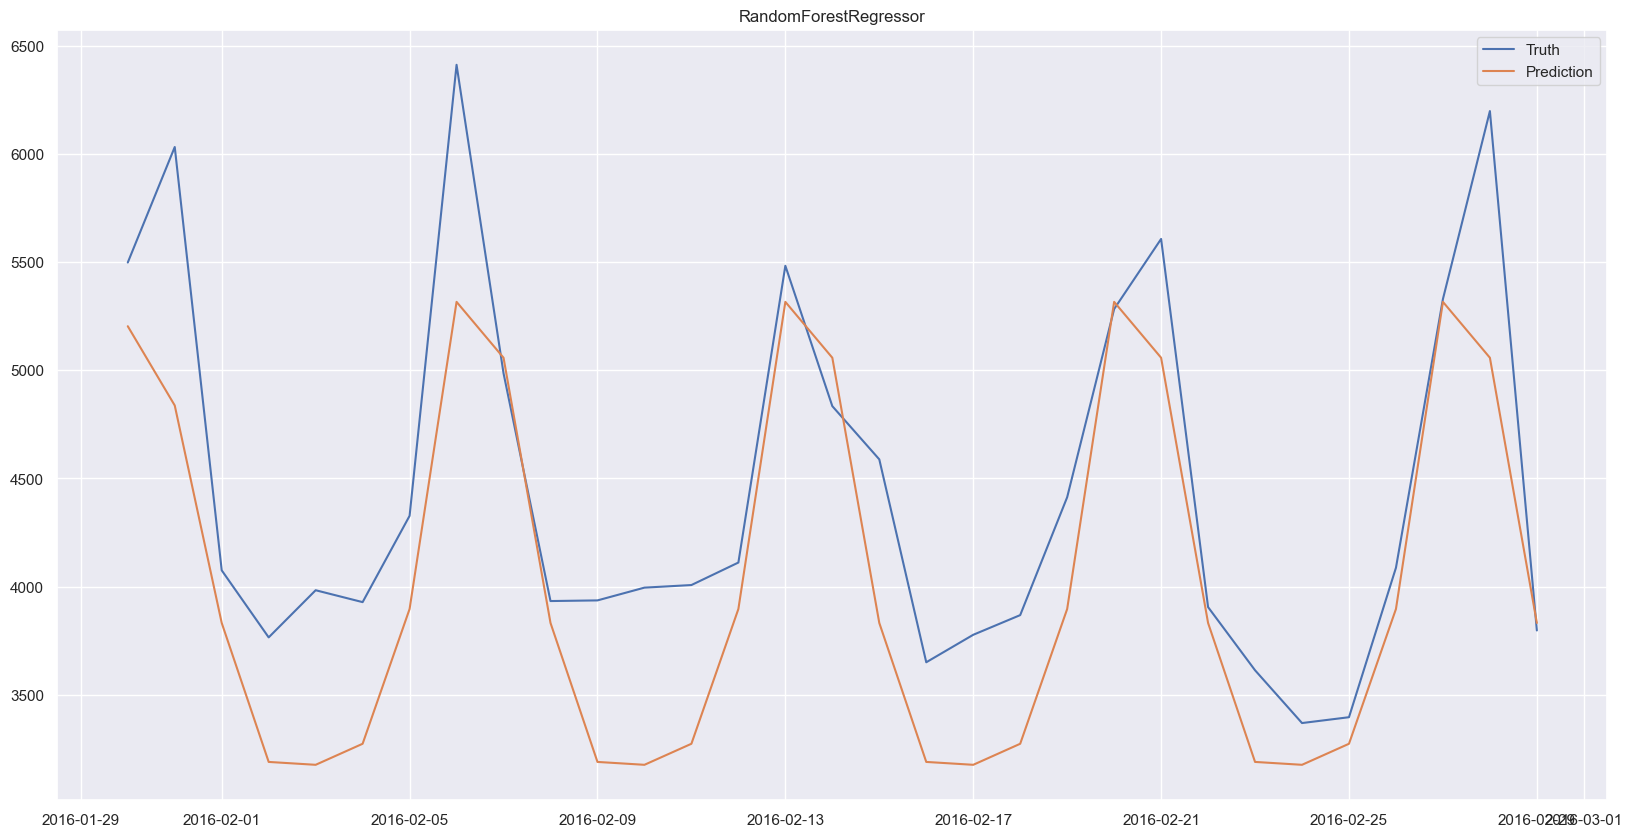

In [40]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_simple
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_simple,
        y=y_simple,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 499.75
MAE mad:	 67.82


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\2743029961.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [42]:

forecast_rf_simple_alldata = rf_simple.fit(X_simple, y_simple)

In [43]:
prediction_rf_simple_alldata = pd.Series(data = forecast_rf_simple_alldata.predict(df_simple_future), index = pd.date_range(start = df_simple_future.index.min(), end = df_simple_future.index.max()))
prediction_rf_simple_alldata.index.name = 'Date'
prediction_rf_simple_alldata.name = 'sales'

In [44]:
prediction_rf_simple_alldata

Date
2016-03-01    3109.135559
2016-03-02    2978.838651
2016-03-03    3129.121638
2016-03-04    3844.314847
2016-03-05    4981.063855
2016-03-06    5202.424866
2016-03-07    3585.079067
2016-03-08    3109.135559
2016-03-09    2978.838651
2016-03-10    3129.121638
2016-03-11    3844.314847
2016-03-12    4981.063855
2016-03-13    5202.424866
2016-03-14    3585.079067
2016-03-15    3109.135559
2016-03-16    2978.838651
2016-03-17    3129.121638
2016-03-18    3844.314847
2016-03-19    4981.063855
2016-03-20    5202.424866
2016-03-21    3585.079067
2016-03-22    3109.135559
2016-03-23    2978.838651
2016-03-24    3129.121638
2016-03-25    3844.314847
2016-03-26    4981.063855
2016-03-27    5202.424866
2016-03-28    3585.079067
2016-03-29    3109.135559
2016-03-30    2978.838651
2016-03-31    3129.121638
Freq: D, Name: sales, dtype: float64

In [45]:
prediction_rf_simple_alldata.to_csv('rf_simple_alldata.csv')

### Random Forest Regressor (Medium DF)

In [46]:
df_medium

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,4.167098,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,4.167098,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,4.167098,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,4.167098,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,4.157467,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0


In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_medium = RandomForestRegressor(n_estimators=1000,criterion='squared_error', max_depth= 8,max_features='log2',max_leaf_nodes = 650,random_state=42, min_samples_split = 9)
x_train, x_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=31, shuffle = False)
rf_medium.fit(x_train, y_train)

# predict on the same period
preds = rf_medium.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 226.82


#### Hyperparameteroptimierung

In [173]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 109, 208, 307, 406, 505, 604, 703, 802, 901, 1000, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [177]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_hyper = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_hyper = RandomizedSearchCV(estimator = rf_hyper, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_hyper.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


c:\Users\edwin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\edwin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\edwin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\edwin\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 109, 208, 307, 406,
                                                      505, 604, 703, 802, 901,
                                                      1000, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [178]:
rf_random_hyper.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 901,
 'bootstrap': True}

In [185]:
rf_medium_hyper = RandomForestRegressor(n_estimators= 800, min_samples_split= 10,min_samples_leaf = 7,max_features = 'log2',max_depth = 800,bootstrap= True,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=31, shuffle = False)
rf_medium_hyper.fit(x_train, y_train)

# predict on the same period
preds = rf_medium_hyper.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 238.61


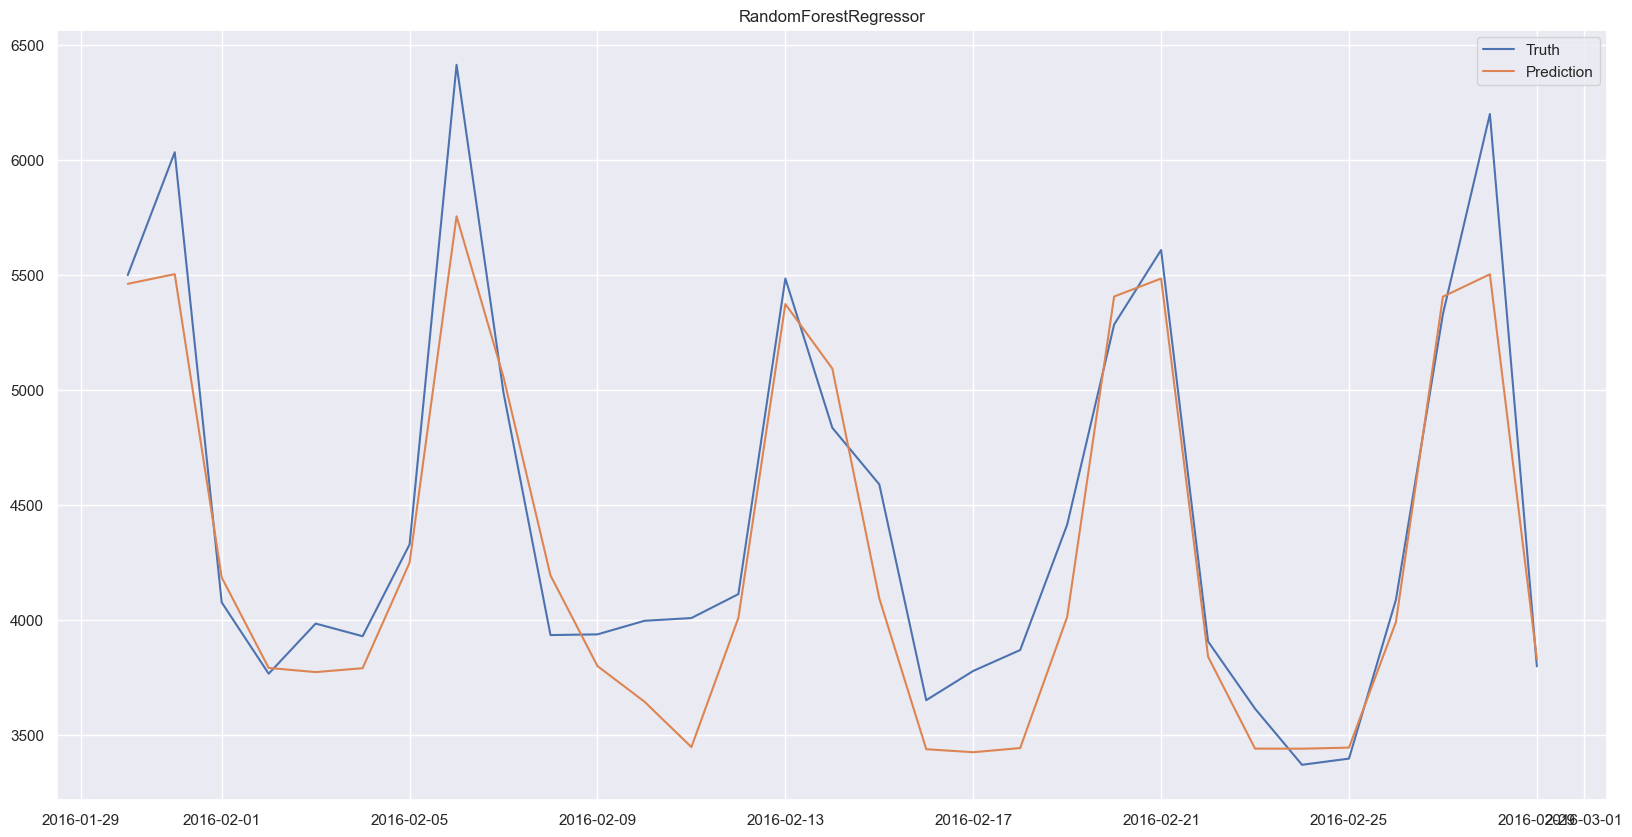

In [48]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_medium
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_medium,
        y=y_medium,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 321.87
MAE mad:	 79.69


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\3287456094.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [50]:
forecast_rf_medium_alldata = rf_medium.fit(X_medium, y_medium)

prediction_rf_medium_alldata = pd.Series(data = forecast_rf_medium_alldata.predict(df_medium_future), index = pd.date_range(start = df_medium_future.index.min(), end = df_medium_future.index.max()))
prediction_rf_medium_alldata.index.name = 'Date'
prediction_rf_medium_alldata.name = 'sales'

prediction_rf_medium_alldata

Date
2016-03-01    3830.380014
2016-03-02    3816.226527
2016-03-03    3821.563946
2016-03-04    4247.231581
2016-03-05    5757.110612
2016-03-06    5784.214331
2016-03-07    4117.184483
2016-03-08    3832.928728
2016-03-09    3818.775240
2016-03-10    3824.112659
2016-03-11    4086.217949
2016-03-12    5337.134313
2016-03-13    5516.505535
2016-03-14    3862.421734
2016-03-15    3517.969961
2016-03-16    3515.243637
2016-03-17    3469.162072
2016-03-18    4087.090903
2016-03-19    5358.664594
2016-03-20    5528.312938
2016-03-21    3861.483508
2016-03-22    3517.810191
2016-03-23    3515.083866
2016-03-24    3505.421528
2016-03-25    4086.217949
2016-03-26    5337.134313
2016-03-27    5010.507731
2016-03-28    3862.421734
2016-03-29    3517.969961
2016-03-30    3515.243637
2016-03-31    3523.434253
Freq: D, Name: sales, dtype: float64

In [51]:
prediction_rf_medium_alldata.to_csv('rf_medium_alldata.csv')

### AdaBoost Medium DF Test

In [237]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,
    random_state=42,
    learning_rate=0.7
)

ada.fit(x_train, y_train)

prediction = pd.Series(
    data = ada.predict(x_test),
    index = x_test.index
)


print('MAE Ada Boost:\t %4.2f' % (MAE(y_true = y_test, y_pred = prediction)))

MAE Ada Boost:	 338.90


### Bagging Regressor DF Medium

In [243]:
from sklearn.ensemble import BaggingRegressor

bagreg = BaggingRegressor(
    rf_medium,
    n_estimators=10,
    bootstrap=True,
    random_state=42,
    n_jobs = -1
)

bagreg.fit(x_train, y_train)

prediction = pd.Series(
    data = bagreg.predict(x_test),
    index = x_test.index
)

print('MAE Bagging:\t %4.2f' % (MAE(y_true = y_test, y_pred = prediction)))

MAE Bagging:	 225.47


In [244]:
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = bagreg
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_medium,
        y=y_medium,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 322.29
MAE mad:	 72.95


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\1432230010.py:21: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [246]:

forecast_bagregrf_medium_alldata = bagreg.fit(X_medium, y_medium)

In [247]:
prediction_bagregrf_medium_alldata = pd.Series(data = forecast_bagregrf_medium_alldata.predict(df_medium_future), index = pd.date_range(start = df_medium_future.index.min(), end = df_medium_future.index.max()))
prediction_bagregrf_medium_alldata.index.name = 'Date'
prediction_bagregrf_medium_alldata.name = 'sales'

In [248]:
prediction_bagregrf_medium_alldata

Date
2016-03-01    3854.639647
2016-03-02    3837.410681
2016-03-03    3852.941725
2016-03-04    4290.812098
2016-03-05    5770.358280
2016-03-06    5790.450365
2016-03-07    4133.280106
2016-03-08    3851.916123
2016-03-09    3834.953991
2016-03-10    3850.329259
2016-03-11    4078.300798
2016-03-12    5337.111193
2016-03-13    5527.470553
2016-03-14    3848.514665
2016-03-15    3526.520840
2016-03-16    3519.560964
2016-03-17    3462.565777
2016-03-18    4080.625532
2016-03-19    5363.208413
2016-03-20    5545.619249
2016-03-21    3847.918259
2016-03-22    3525.135821
2016-03-23    3518.212292
2016-03-24    3537.059621
2016-03-25    4078.300798
2016-03-26    5337.111193
2016-03-27    5089.777429
2016-03-28    3847.910631
2016-03-29    3526.520840
2016-03-30    3519.560964
2016-03-31    3526.077117
Freq: D, Name: sales, dtype: float64

In [249]:
prediction_bagregrf_medium_alldata.to_csv('bagregrf_medium_alldata.csv')

### Random Forest Data Frame Expansion Medium

In [240]:
rf_medium_exp = RandomForestRegressor(n_estimators=1000,criterion='squared_error', max_depth= 8,max_features='log2',max_leaf_nodes = 650,random_state=42, min_samples_split = 9)
x_train, x_test, y_train, y_test = train_test_split(X_medium_exp, y_medium_exp, test_size=31, shuffle = False)
rf_medium_exp.fit(x_train, y_train)

# predict on the same period
preds = rf_medium_exp.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 237.66


In [189]:
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_medium_exp
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_medium_exp,
        y=y_medium_exp,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 317.57
MAE mad:	 70.69


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\181431752.py:21: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [191]:
forecast_rf_medium_exp_alldata = rf_medium_exp.fit(X_medium_exp, y_medium_exp)
forecast_rf_medium_exp_alldata = pd.Series(data = forecast_rf_medium_exp_alldata.predict(df_medium_exp_future), index = pd.date_range(start = df_medium_exp_future.index.min(), end = df_medium_exp_future.index.max()))
forecast_rf_medium_exp_alldata.index.name = 'Date'
forecast_rf_medium_exp_alldata.name = 'sales'
forecast_rf_medium_exp_alldata

Date
2016-03-01    3877.992317
2016-03-02    3871.221973
2016-03-03    3878.394419
2016-03-04    4320.695641
2016-03-05    5778.506364
2016-03-06    5791.913331
2016-03-07    4151.151340
2016-03-08    3881.289895
2016-03-09    3874.885442
2016-03-10    3882.507088
2016-03-11    4157.780593
2016-03-12    5422.832129
2016-03-13    5498.402158
2016-03-14    3889.344887
2016-03-15    3554.754439
2016-03-16    3553.504464
2016-03-17    3510.508078
2016-03-18    4075.959246
2016-03-19    5428.947825
2016-03-20    5502.345389
2016-03-21    3849.882543
2016-03-22    3518.052102
2016-03-23    3518.915424
2016-03-24    3417.229719
2016-03-25    3986.339205
2016-03-26    5360.549476
2016-03-27    5140.498993
2016-03-28    3806.900637
2016-03-29    3504.075939
2016-03-30    3533.942446
2016-03-31    3563.707356
Freq: D, Name: sales, dtype: float64

In [192]:
forecast_rf_medium_exp_alldata.to_csv('rf_medium_exp_alldata.csv')

### Random Forest Regressor (DF Complex)

#### Foods

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_foods = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_foods, y_foods, test_size=31, shuffle = False)
rf_foods.fit(x_train, y_train)

# predict on the same period
preds = rf_foods.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 239.75


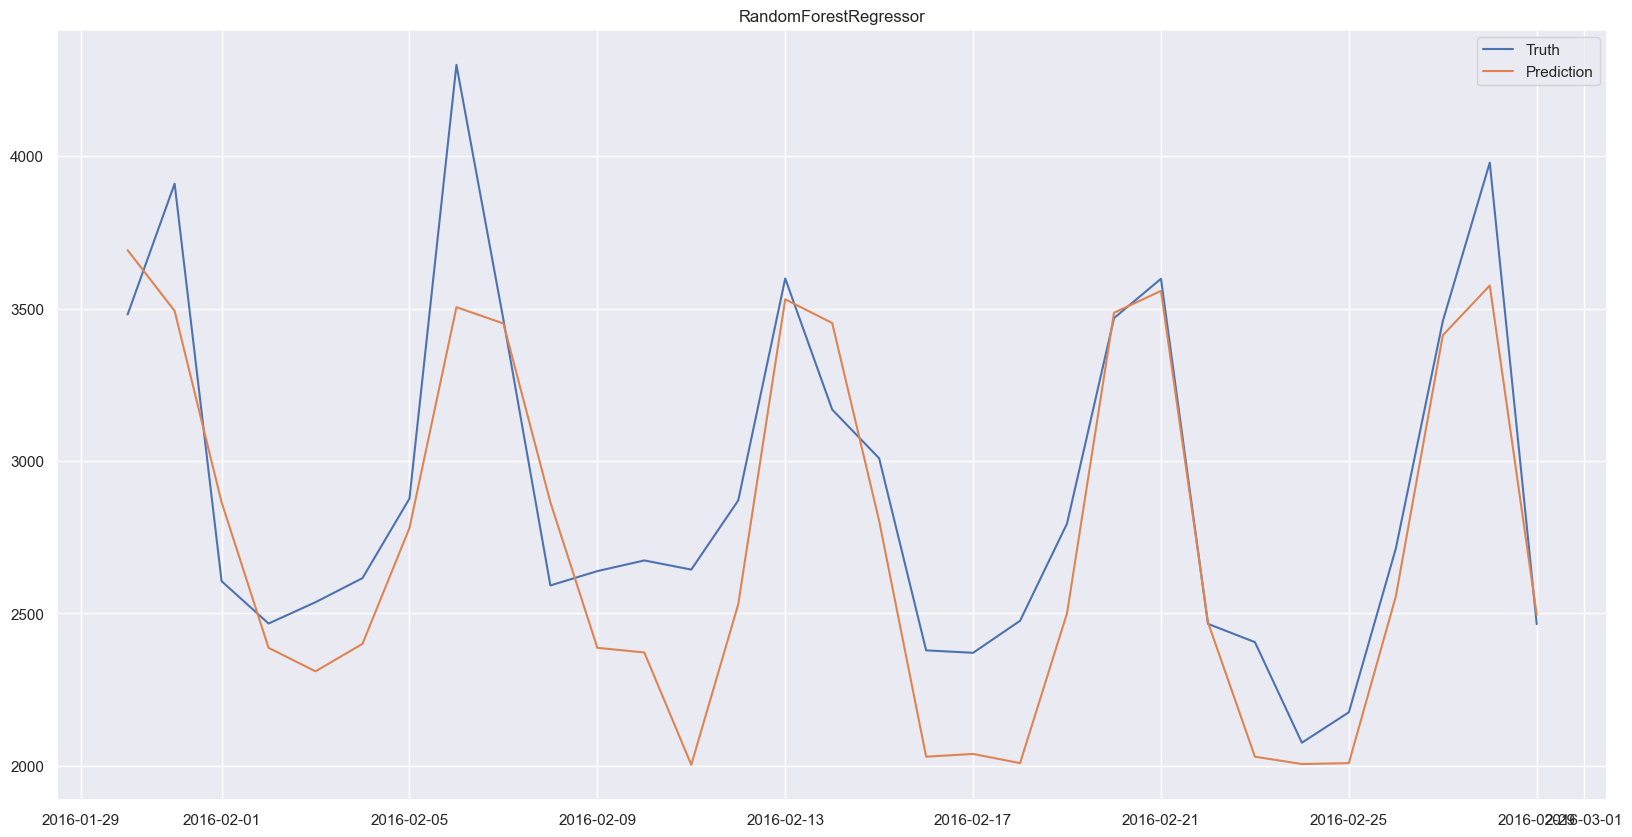

In [53]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [54]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_foods
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_foods,
        y=y_foods,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 282.00
MAE mad:	 47.89


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\640663017.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [55]:
forecast_rf_foods_alldata = rf_foods.fit(X_foods, y_foods)

prediction_rf_foods_alldata = pd.Series(data = forecast_rf_foods_alldata.predict(df_foods_future), index = pd.date_range(start = df_foods_future.index.min(), end = df_foods_future.index.max()))
prediction_rf_foods_alldata.index.name = 'Date'
prediction_rf_foods_alldata.name = 'sales'

prediction_rf_foods_alldata

Date
2016-03-01    2466.84
2016-03-02    2446.71
2016-03-03    2463.96
2016-03-04    2891.01
2016-03-05    3851.86
2016-03-06    3903.15
2016-03-07    2689.65
2016-03-08    2465.52
2016-03-09    2445.82
2016-03-10    2463.73
2016-03-11    2743.53
2016-03-12    3408.28
2016-03-13    3838.71
2016-03-14    2516.41
2016-03-15    2229.31
2016-03-16    2177.24
2016-03-17    2107.33
2016-03-18    2743.53
2016-03-19    3548.82
2016-03-20    3766.07
2016-03-21    2488.52
2016-03-22    2192.55
2016-03-23    2113.21
2016-03-24    2254.91
2016-03-25    2710.40
2016-03-26    3403.17
2016-03-27    3459.78
2016-03-28    2512.10
2016-03-29    2229.31
2016-03-30    2177.24
2016-03-31    2132.08
Freq: D, Name: sales, dtype: float64

#### Household

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_household = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_household, y_household, test_size=31, shuffle = False)
rf_household.fit(x_train, y_train)

# predict on the same period
preds = rf_household.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 138.04


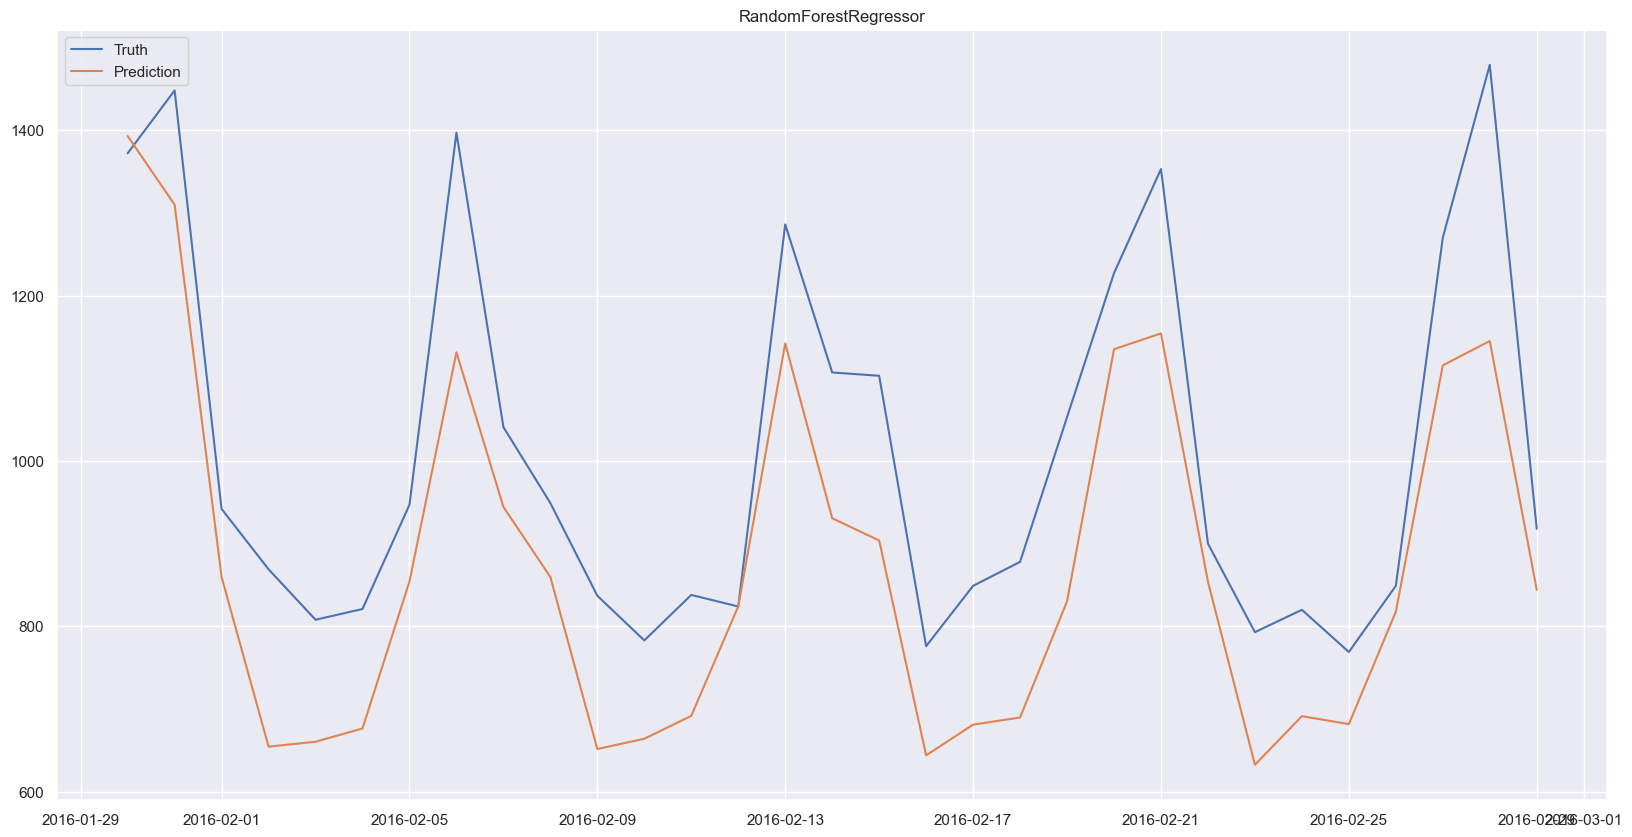

In [57]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [58]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_household
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_household,
        y=y_household,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 132.87
MAE mad:	 25.22


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\1091543212.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [59]:
forecast_rf_household_alldata = rf_household.fit(X_household, y_household)

prediction_rf_household_alldata = pd.Series(data = forecast_rf_household_alldata.predict(df_household_future), index = pd.date_range(start = df_household_future.index.min(), end = df_household_future.index.max()))
prediction_rf_household_alldata.index.name = 'Date'
prediction_rf_household_alldata.name = 'sales'

prediction_rf_household_alldata

Date
2016-03-01     797.68
2016-03-02     800.23
2016-03-03     791.54
2016-03-04     866.64
2016-03-05    1220.22
2016-03-06    1313.16
2016-03-07     916.69
2016-03-08     728.68
2016-03-09     753.36
2016-03-10     748.30
2016-03-11     846.02
2016-03-12    1226.36
2016-03-13    1350.60
2016-03-14     896.33
2016-03-15     707.91
2016-03-16     750.63
2016-03-17     741.80
2016-03-18     838.78
2016-03-19    1226.36
2016-03-20    1350.60
2016-03-21     896.33
2016-03-22     707.91
2016-03-23     750.63
2016-03-24     744.63
2016-03-25     838.78
2016-03-26    1234.10
2016-03-27    1013.13
2016-03-28     898.92
2016-03-29     716.41
2016-03-30     760.80
2016-03-31     749.73
Freq: D, Name: sales, dtype: float64

#### Hobbies

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_hobbies = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_hobbies, y_hobbies, test_size=31, shuffle = False)
rf_hobbies.fit(x_train, y_train)

# predict on the same period
preds = rf_hobbies.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 85.32


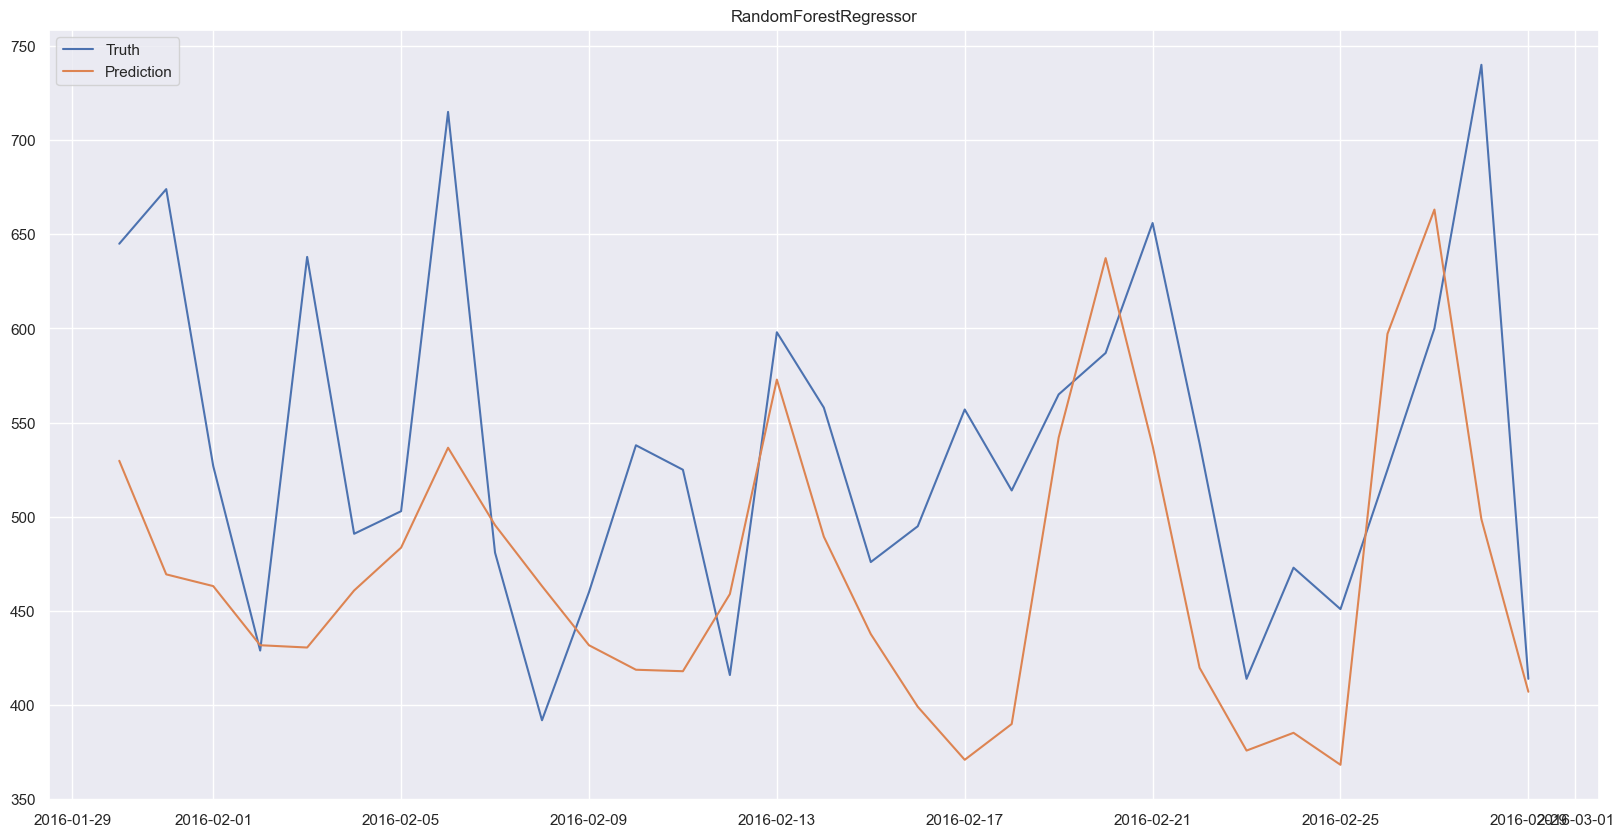

In [61]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])


In [62]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_hobbies
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_hobbies,
        y=y_hobbies,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 73.57
MAE mad:	 11.92


C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\1897965379.py:24: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [63]:
forecast_rf_hobbies_alldata = rf_hobbies.fit(X_hobbies, y_hobbies)

prediction_rf_hobbies_alldata = pd.Series(data = forecast_rf_hobbies_alldata.predict(df_hobbies_future), index = pd.date_range(start = df_hobbies_future.index.min(), end = df_hobbies_future.index.max()))
prediction_rf_hobbies_alldata.index.name = 'Date'
prediction_rf_hobbies_alldata.name = 'sales'

prediction_rf_hobbies_alldata

Date
2016-03-01    475.250000
2016-03-02    456.130833
2016-03-03    444.657500
2016-03-04    525.006667
2016-03-05    558.140000
2016-03-06    476.870000
2016-03-07    452.973500
2016-03-08    444.840143
2016-03-09    540.972500
2016-03-10    489.100000
2016-03-11    452.790000
2016-03-12    521.190000
2016-03-13    477.220000
2016-03-14    426.765000
2016-03-15    463.615000
2016-03-16    470.075000
2016-03-17    425.706667
2016-03-18    429.710000
2016-03-19    521.190000
2016-03-20    477.220000
2016-03-21    426.765000
2016-03-22    463.615000
2016-03-23    470.075000
2016-03-24    393.960000
2016-03-25    429.710000
2016-03-26    521.190000
2016-03-27    492.270000
2016-03-28    426.765000
2016-03-29    463.615000
2016-03-30    470.075000
2016-03-31    437.156667
Freq: D, Name: sales, dtype: float64

In [64]:
prediction_rf_complex_alldata = prediction_rf_hobbies_alldata + prediction_rf_foods_alldata + prediction_rf_household_alldata
prediction_rf_complex_alldata

Date
2016-03-01    3739.770000
2016-03-02    3703.070833
2016-03-03    3700.157500
2016-03-04    4282.656667
2016-03-05    5630.220000
2016-03-06    5693.180000
2016-03-07    4059.313500
2016-03-08    3639.040143
2016-03-09    3740.152500
2016-03-10    3701.130000
2016-03-11    4042.340000
2016-03-12    5155.830000
2016-03-13    5666.530000
2016-03-14    3839.505000
2016-03-15    3400.835000
2016-03-16    3397.945000
2016-03-17    3274.836667
2016-03-18    4012.020000
2016-03-19    5296.370000
2016-03-20    5593.890000
2016-03-21    3811.615000
2016-03-22    3364.075000
2016-03-23    3333.915000
2016-03-24    3393.500000
2016-03-25    3978.890000
2016-03-26    5158.460000
2016-03-27    4965.180000
2016-03-28    3837.785000
2016-03-29    3409.335000
2016-03-30    3408.115000
2016-03-31    3318.966667
Freq: D, Name: sales, dtype: float64

In [65]:
prediction_rf_complex_alldata.to_csv('rf_complex_alldata.csv')

### XG-Boost (Medium)

In [66]:
'''
import xgboost as xgb

X_medium[['dayofweek','month','event_code','snap']] = X_medium[['dayofweek','month','event_code','snap']].astype('int')

xgb_medium = xgb.XGBRegressor()
x_train, x_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=31, shuffle = False)
xgb_medium.fit(x_train,y_train)
preds = xgb_medium.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))
'''

"\nimport xgboost as xgb\n\nX_medium[['dayofweek','month','event_code','snap']] = X_medium[['dayofweek','month','event_code','snap']].astype('int')\n\nxgb_medium = xgb.XGBRegressor()\nx_train, x_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=31, shuffle = False)\nxgb_medium.fit(x_train,y_train)\npreds = xgb_medium.predict(x_test)\nprint('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))\n"

In [67]:
'''
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('XGBoost')
plt.legend(['Truth','Prediction'])
'''

"\nplt.plot(y_test.index, y_test)\nplt.plot(y_test.index, preds)\nplt.title('XGBoost')\nplt.legend(['Truth','Prediction'])\n"

In [68]:
'''
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = xgb_medium
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_medium,
        y=y_medium,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))
'''

"\ncv = TimeSeriesSplit(\n    n_splits=5,\n    test_size=31,\n    gap=0\n)\n\nforecast = xgb_medium\nscores = pd.DataFrame(\n    cross_validate(\n        estimator=forecast,\n        X=X_medium,\n        y=y_medium,\n        scoring = 'neg_mean_absolute_error',\n        cv = cv,\n        verbose = 0\n    )\n)\n# display(scores)\n\nprint('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))\nprint('MAE mad:\t %4.2f' % (scores['test_score'].mad()))\n"

### SARIMAX (DF Medium)

In [70]:
%pip install sktime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [252]:
from pmdarima import auto_arima

sarimax_model = auto_arima(y= y_train, X=x_train, m=7)

In [256]:
predictions_sarimax = pd.Series(sarimax_model.predict(n_periods = 31, X= x_test))
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = predictions_sarimax)))

MAE:	 659.98


In [71]:
from sktime.forecasting.sarimax import SARIMAX

In [72]:
df_dates_future = pd.DataFrame(df_medium_future.index)
df_dates_future

,date
0,2016-03-01
1,2016-03-02
2,2016-03-03
3,2016-03-04
4,2016-03-05
5,2016-03-06
6,2016-03-07
7,2016-03-08
8,2016-03-09
9,2016-03-10


In [73]:
df_future_test_sarimax = df_medium_future.reset_index().drop(columns='date')
df_future_test_sarimax 

,dayofweek,month,price,event_code,snap
0,1.0,3.0,4.492801,-1.0,1.0
1,2.0,3.0,4.492801,-1.0,1.0
2,3.0,3.0,4.492801,-1.0,1.0
3,4.0,3.0,4.492801,-1.0,1.0
4,5.0,3.0,4.490062,-1.0,1.0
5,6.0,3.0,4.490062,-1.0,1.0
6,0.0,3.0,4.490062,-1.0,1.0
7,1.0,3.0,4.490062,-1.0,1.0
8,2.0,3.0,4.490062,-1.0,1.0
9,3.0,3.0,4.490062,-1.0,1.0


In [74]:

sarimax_medium = SARIMAX(
    order=(1, 0, 0), trend="t", seasonal_order=(1, 0, 0, 6))  
sarimax_medium.fit(y_medium,X=X_medium)  
y_pred = sarimax_medium.predict(fh=df_dates_future,X=df_future_test_sarimax)

c:\Users\edwin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\edwin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


TypeError: Invalid `fh`. The type of the passed `fh` values is not supported. Please use one of ('int', '1D np.ndarray of type int', '1D np.ndarray of type timedelta or dateoffset', 'list', 'pd.RangeIndex', 'pd.PeriodIndex', 'pd.DatetimeIndex', 'pd.TimedeltaIndex'), but found type <class 'pandas.core.frame.DataFrame'>, values =          date
0  2016-03-01
1  2016-03-02
2  2016-03-03
3  2016-03-04
4  2016-03-05
5  2016-03-06
6  2016-03-07
7  2016-03-08
8  2016-03-09
9  2016-03-10
10 2016-03-11
11 2016-03-12
12 2016-03-13
13 2016-03-14
14 2016-03-15
15 2016-03-16
16 2016-03-17
17 2016-03-18
18 2016-03-19
19 2016-03-20
20 2016-03-21
21 2016-03-22
22 2016-03-23
23 2016-03-24
24 2016-03-25
25 2016-03-26
26 2016-03-27
27 2016-03-28
28 2016-03-29
29 2016-03-30
30 2016-03-31

In [75]:
X_medium

,dayofweek,month,price,event_code,snap
date,,,,,
2011-03-01,1.0,3.0,4.167098,-1.0,1.0
2011-03-02,2.0,3.0,4.167098,-1.0,1.0
2011-03-03,3.0,3.0,4.167098,-1.0,1.0
2011-03-04,4.0,3.0,4.167098,-1.0,1.0
2011-03-05,5.0,3.0,4.157467,-1.0,1.0
...,...,...,...,...,...
2016-02-25,3.0,2.0,4.495005,-1.0,0.0
2016-02-26,4.0,2.0,4.495005,-1.0,0.0
2016-02-27,5.0,2.0,4.492801,-1.0,0.0


In [76]:
from sktime.datasets import load_airline

airline = load_airline()
airline

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [ ]:
forecaster = SARIMAX(
    order=(1, 0, 0), trend="t", seasonal_order=(1, 0, 0, 6))

In [ ]:
forecaster.fit(airline)

c:\Users\edwin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMAX(seasonal_order=(1, 0, 0, 6), trend='t')

In [ ]:
y_pred = forecaster.predict(fh=airline.index)
y_pred

Period
1949-01      3.776783
1949-02     99.206950
1949-03    104.885309
1949-04    117.657355
1949-05    115.310625
              ...    
1960-08    613.401839
1960-09    596.671225
1960-10    509.030799
1960-11    469.227709
1960-12    403.494716
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

### Artificial Neural Network

#### Medium Data Frame

In [77]:
df_medium_norm = df_medium
df_medium_norm

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,4.167098,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,4.167098,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,4.167098,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,4.167098,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,4.157467,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0


##### Daten skalieren

In [290]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler(feature_range=(0, 1))
norm_price = scaler.fit_transform(df_medium_norm[['price']])
df_medium_norm['price'] = norm_price
df_medium_norm

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,0.028194,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,0.028194,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,0.028194,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,0.028194,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,0.000000,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,0.972627,0.0,0.0
2016-03-28,0.0,0.0,3.0,0.972627,-1.0,0.0
2016-03-29,0.0,1.0,3.0,0.972627,-1.0,0.0


In [80]:
df_medium_norm = pd.get_dummies(
    data = df_medium_norm,
    columns = ['dayofweek','month','event_code','snap'],
    drop_first = False
)

In [81]:
df_medium_norm

,sales,price,dayofweek_0.0,dayofweek_1.0,dayofweek_2.0,dayofweek_3.0,dayofweek_4.0,dayofweek_5.0,dayofweek_6.0,month_1.0,...,month_10.0,month_11.0,month_12.0,event_code_-1.0,event_code_0.0,event_code_1.0,event_code_2.0,event_code_3.0,snap_0.0,snap_1.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.028194,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-02,2559.0,0.028194,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-03,2568.0,0.028194,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-04,2978.0,0.028194,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-05,4096.0,0.000000,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,0.972627,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2016-03-28,0.0,0.972627,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-03-29,0.0,0.972627,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [82]:
df_medium_norm_past = df_medium_norm[df_medium_norm.index<'2016-03-01']
df_medium_norm_future = df_medium_norm[df_medium_norm.index>='2016-03-01']
df_medium_norm_future.drop(columns='sales',inplace=True)
X_medium_norm = df_medium_norm_past.drop(columns='sales')
y_medium_norm = df_medium_norm_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\2628191844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_norm_future.drop(columns='sales',inplace=True)


In [83]:
df_medium_norm_past['sales'].values

array([2549., 2559., 2568., ..., 5329., 6198., 3797.])

In [84]:
from sklearn.preprocessing import StandardScaler

target_variable = df_medium_norm_past['sales'].values
TargetVarScaler=StandardScaler()
target_variable = target_variable.reshape(-1, 1)
TargetVarScalerFit=TargetVarScaler.fit(target_variable)
y_medium_norm = TargetVarScalerFit.transform(target_variable)

In [85]:
y_medium_norm

array([[-1.4937988 ],
       [-1.48365713],
       [-1.47452963],
       ...,
       [ 1.32558478],
       [ 2.20689569],
       [-0.22811869]])

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_medium_norm, y_medium_norm, test_size=31, shuffle = False)

In [87]:
%pip install tensorflow

  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp310-cp310-win_amd64.whl (266.3 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
from numpy.random import seed
import tensorflow
seed(1)
tensorflow.random.set_seed(2)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [159]:
ann = Sequential()

#first layer
ann.add(Dense(units=5, input_dim=27, kernel_initializer='normal', activation='relu'))

#hidden layer
ann.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

#ann.add(Dense(units=320, kernel_initializer='normal', activation='relu'))

#output layer
ann.add(Dense(1, kernel_initializer='normal'))

In [160]:
ann.compile(loss='mean_absolute_error', optimizer='adam')

In [161]:
ann.fit(x_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
90/90 [==============================] - 1s 1ms/step - loss: 0.7900
Epoch 2/50
90/90 [==============================] - 0s 1ms/step - loss: 0.7450
Epoch 3/50
90/90 [==============================] - 0s 1ms/step - loss: 0.6078
Epoch 4/50
90/90 [==============================] - 0s 1ms/step - loss: 0.4741
Epoch 5/50
90/90 [==============================] - 0s 994us/step - loss: 0.4161
Epoch 6/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3938
Epoch 7/50
90/90 [==============================] - 0s 949us/step - loss: 0.3752
Epoch 8/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3643
Epoch 9/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3583
Epoch 10/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3558
Epoch 11/50
90/90 [==============================] - 0s 985us/step - loss: 0.3550
Epoch 12/50
90/90 [==============================] - 0s 1ms/step - loss: 0.3524
Epoch 13/50
90/90 [========================

In [162]:
Predictions=ann.predict(x_test)

1/1 [==============================] - 0s 43ms/step


In [163]:
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

In [164]:
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

In [165]:
from sklearn.metrics import mean_absolute_error as MAE
print('MAE:\t %4.2f' % (MAE(y_true = y_test_orig, y_pred = Predictions)))

MAE:	 251.86


In [333]:
ann.fit(X_medium_norm, y_medium_norm,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
92/92 [==============================] - 0s 638us/step - loss: 0.3399
Epoch 2/50
92/92 [==============================] - 0s 586us/step - loss: 0.3399
Epoch 3/50
92/92 [==============================] - 0s 583us/step - loss: 0.3402
Epoch 4/50
92/92 [==============================] - 0s 583us/step - loss: 0.3384
Epoch 5/50
92/92 [==============================] - 0s 594us/step - loss: 0.3398
Epoch 6/50
92/92 [==============================] - 0s 594us/step - loss: 0.3412
Epoch 7/50
92/92 [==============================] - 0s 616us/step - loss: 0.3387
Epoch 8/50
92/92 [==============================] - 0s 583us/step - loss: 0.3382
Epoch 9/50
92/92 [==============================] - 0s 583us/step - loss: 0.3381
Epoch 10/50
92/92 [==============================] - 0s 594us/step - loss: 0.3374
Epoch 11/50
92/92 [==============================] - 0s 593us/step - loss: 0.3372
Epoch 12/50
92/92 [==============================] - 0s 605us/step - loss: 0.3374
Epoch 13/50
92/92 [======

In [334]:
prediction_ann_alldata = ann.predict(df_medium_norm_future)
prediction_ann_alldata

1/1 [==============================] - 0s 11ms/step


array([[ 0.04632494],
       [-0.0392695 ],
       [ 0.00524516],
       [ 0.75474024],
       [ 1.8064365 ],
       [ 1.9037162 ],
       [ 0.4380243 ],
       [ 0.03086828],
       [-0.05470001],
       [-0.01019914],
       [ 0.27736905],
       [ 1.4522531 ],
       [ 1.5763456 ],
       [-0.02953077],
       [-0.43224058],
       [-0.5153333 ],
       [-0.79126805],
       [ 0.2757379 ],
       [ 1.4539558 ],
       [ 1.5779872 ],
       [-0.0275384 ],
       [-0.43029806],
       [-0.51340747],
       [-0.46287975],
       [ 0.27773988],
       [ 1.4519852 ],
       [ 0.9805743 ],
       [-0.02984411],
       [-0.43254617],
       [-0.5156361 ],
       [-0.4724495 ]], dtype=float32)

In [335]:
prediction_ann_alldata_norm = TargetVarScalerFit.inverse_transform(prediction_ann_alldata)
prediction_ann_alldata_norm

array([[4067.6099],
       [3983.2112],
       [4027.104 ],
       [4766.1294],
       [5803.135 ],
       [5899.0557],
       [4453.838 ],
       [4052.3691],
       [3967.9963],
       [4011.8755],
       [4295.427 ],
       [5453.899 ],
       [5576.258 ],
       [3992.814 ],
       [3595.7295],
       [3513.7974],
       [3241.7173],
       [4293.8184],
       [5455.5776],
       [5577.8765],
       [3994.7783],
       [3597.6448],
       [3515.6963],
       [3565.5183],
       [4295.7925],
       [5453.635 ],
       [4988.809 ],
       [3992.505 ],
       [3595.4282],
       [3513.499 ],
       [3556.0823]], dtype=float32)

In [336]:
prediction_ann_alldata_norm_df = pd.DataFrame(prediction_ann_alldata_norm, index = df_medium_future.index)

In [337]:
prediction_ann_alldata_norm_df

,0
date,
2016-03-01,4067.609863
2016-03-02,3983.211182
2016-03-03,4027.104004
2016-03-04,4766.129395
2016-03-05,5803.134766
2016-03-06,5899.055664
2016-03-07,4453.837891
2016-03-08,4052.369141
2016-03-09,3967.996338


In [339]:
prediction_ann_alldata = pd.Series(data = prediction_ann_alldata_norm_df[0])

In [340]:
prediction_ann_alldata

date
2016-03-01    4067.609863
2016-03-02    3983.211182
2016-03-03    4027.104004
2016-03-04    4766.129395
2016-03-05    5803.134766
2016-03-06    5899.055664
2016-03-07    4453.837891
2016-03-08    4052.369141
2016-03-09    3967.996338
2016-03-10    4011.875488
2016-03-11    4295.426758
2016-03-12    5453.898926
2016-03-13    5576.257812
2016-03-14    3992.813965
2016-03-15    3595.729492
2016-03-16    3513.797363
2016-03-17    3241.717285
2016-03-18    4293.818359
2016-03-19    5455.577637
2016-03-20    5577.876465
2016-03-21    3994.778320
2016-03-22    3597.644775
2016-03-23    3515.696289
2016-03-24    3565.518311
2016-03-25    4295.792480
2016-03-26    5453.634766
2016-03-27    4988.809082
2016-03-28    3992.504883
2016-03-29    3595.428223
2016-03-30    3513.499023
2016-03-31    3556.082275
Name: 0, dtype: float32

In [209]:
prediction_ann_alldata
prediction_ann_alldata.index.name = 'Date'
prediction_ann_alldata.name = 'sales'

In [210]:
prediction_ann_alldata

Date
2016-03-01    3998.512939
2016-03-02    3890.437744
2016-03-03    3976.205811
2016-03-04    4686.378418
2016-03-05    5664.125488
2016-03-06    5865.234863
2016-03-07    4396.777344
2016-03-08    3984.116943
2016-03-09    3876.175293
2016-03-10    3961.830078
2016-03-11    4219.976562
2016-03-12    5334.134766
2016-03-13    5501.578613
2016-03-14    3943.476562
2016-03-15    3541.874512
2016-03-16    3440.117188
2016-03-17    3191.751953
2016-03-18    4218.442871
2016-03-19    5335.639648
2016-03-20    5503.176758
2016-03-21    3945.333496
2016-03-22    3543.652344
2016-03-23    3441.861572
2016-03-24    3565.581055
2016-03-25    4220.325195
2016-03-26    5333.897949
2016-03-27    4874.651367
2016-03-28    3943.184326
2016-03-29    3541.594727
2016-03-30    3439.842285
2016-03-31    3520.342773
Name: sales, dtype: float32

In [211]:
prediction_ann_alldata.to_csv('prediction_ann_alldata.csv')

#### Medium Exp Data Frame

In [197]:
df_medium_exp_norm = df_medium_exp
df_medium_exp_norm.dtypes

sales                 float64
dayofweek            category
month                category
price                 float64
event_code           category
snap                 category
price_change_day      float64
price_change_week     float64
snap_since              int64
dtype: object

In [199]:
scaler = MinMaxScaler(feature_range=(0, 1))
norm_price = scaler.fit_transform(df_medium_exp_norm[['price']])
norm_price_change_day = scaler.fit_transform(df_medium_exp_norm[['price_change_day']])
norm_price_change_week = scaler.fit_transform(df_medium_exp_norm[['price_change_week']])
norm_snap_since = scaler.fit_transform(df_medium_exp_norm[['snap_since']])
df_medium_exp_norm['price'] = norm_price
df_medium_exp_norm['price_change_day'] = norm_price_change_day
df_medium_exp_norm['price_change_week'] = norm_price_change_week
df_medium_exp_norm['snap_since'] = norm_snap_since
df_medium_exp_norm

,sales,dayofweek,month,price,event_code,snap,price_change_day,price_change_week,snap_since
date,,,,,,,,,
2011-03-01,2549.0,1.0,3.0,0.028194,-1.0,1.0,0.312687,0.312687,0.000000
2011-03-02,2559.0,2.0,3.0,0.028194,-1.0,1.0,0.312687,0.312687,0.000000
2011-03-03,2568.0,3.0,3.0,0.028194,-1.0,1.0,0.312687,0.312687,0.000000
2011-03-04,2978.0,4.0,3.0,0.028194,-1.0,1.0,0.312687,0.312687,0.000000
2011-03-05,4096.0,5.0,3.0,0.000000,-1.0,1.0,0.161918,0.312687,0.000000
...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,0.972627,0.0,0.0,0.312687,0.306270,0.809524
2016-03-28,0.0,0.0,3.0,0.972627,-1.0,0.0,0.312687,0.306270,0.857143
2016-03-29,0.0,1.0,3.0,0.972627,-1.0,0.0,0.312687,0.306270,0.904762


In [201]:
df_medium_exp_norm = pd.get_dummies(
    data = df_medium_exp_norm,
    columns = ['dayofweek','month','event_code','snap'],
    drop_first = False
)

In [209]:
df_medium_exp_norm

,sales,price,price_change_day,price_change_week,snap_since,dayofweek_0.0,dayofweek_1.0,dayofweek_2.0,dayofweek_3.0,dayofweek_4.0,...,month_10.0,month_11.0,month_12.0,event_code_-1.0,event_code_0.0,event_code_1.0,event_code_2.0,event_code_3.0,snap_0.0,snap_1.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.028194,0.312687,0.312687,0.000000,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-02,2559.0,0.028194,0.312687,0.312687,0.000000,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-03,2568.0,0.028194,0.312687,0.312687,0.000000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-04,2978.0,0.028194,0.312687,0.312687,0.000000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2011-03-05,4096.0,0.000000,0.161918,0.312687,0.000000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,0.972627,0.312687,0.306270,0.809524,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2016-03-28,0.0,0.972627,0.312687,0.306270,0.857143,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-03-29,0.0,0.972627,0.312687,0.306270,0.904762,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [203]:
df_medium_exp_norm_past = df_medium_exp_norm[df_medium_exp_norm.index<'2016-03-01']
df_medium_exp_norm_future = df_medium_exp_norm[df_medium_exp_norm.index>='2016-03-01']
df_medium_exp_norm_future.drop(columns='sales',inplace=True)
X_medium_exp_norm = df_medium_exp_norm_past.drop(columns='sales')
y_medium_exp_norm = df_medium_exp_norm_past['sales']

C:\Users\edwin\AppData\Local\Temp\ipykernel_14436\3587352629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_exp_norm_future.drop(columns='sales',inplace=True)


In [204]:
df_medium_exp_norm_past['sales'].values

array([2549., 2559., 2568., ..., 5329., 6198., 3797.])

In [205]:
from sklearn.preprocessing import StandardScaler

target_variable = df_medium_exp_norm_past['sales'].values
TargetVarScaler=StandardScaler()
target_variable = target_variable.reshape(-1, 1)
TargetVarScalerFit=TargetVarScaler.fit(target_variable)
y_medium_exp_norm = TargetVarScalerFit.transform(target_variable)

In [206]:
y_medium_exp_norm

array([[-1.4937988 ],
       [-1.48365713],
       [-1.47452963],
       ...,
       [ 1.32558478],
       [ 2.20689569],
       [-0.22811869]])

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_medium_exp_norm, y_medium_exp_norm, test_size=31, shuffle = False)

In [208]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [213]:
ann_exp = Sequential()

#first layer
ann_exp.add(Dense(units=5, input_dim=30, kernel_initializer='normal', activation='relu'))

#hidden layer
ann_exp.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

#ann_exp.add(Dense(units=320, kernel_initializer='normal', activation='relu'))

#output layer
ann_exp.add(Dense(1, kernel_initializer='normal'))

In [214]:
ann_exp.compile(loss='mean_absolute_error', optimizer='adam')

In [215]:
ann_exp.fit(x_train, y_train ,batch_size = 20, epochs = 50, verbose=0)

In [216]:
Predictions_exp =ann_exp.predict(x_test)

1/1 [==============================] - 0s 110ms/step


In [217]:
Predictions_exp=TargetVarScalerFit.inverse_transform(Predictions_exp)

In [219]:
y_test_exp_orig=TargetVarScalerFit.inverse_transform(y_test)

In [220]:
from sklearn.metrics import mean_absolute_error as MAE
print('MAE:\t %4.2f' % (MAE(y_true = y_test_exp_orig, y_pred = Predictions_exp)))

MAE:	 259.70


In [221]:
ann_exp.fit(X_medium_exp_norm, y_medium_exp_norm,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
92/92 [==============================] - 1s 8ms/step - loss: 0.3438
Epoch 2/50
92/92 [==============================] - 0s 4ms/step - loss: 0.3423
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3423
Epoch 4/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3425
Epoch 5/50
92/92 [==============================] - 0s 4ms/step - loss: 0.3416
Epoch 6/50
92/92 [==============================] - 0s 4ms/step - loss: 0.3434
Epoch 7/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3438
Epoch 8/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3419
Epoch 9/50
92/92 [==============================] - 0s 4ms/step - loss: 0.3414
Epoch 10/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3418
Epoch 11/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3427
Epoch 12/50
92/92 [==============================] - 0s 3ms/step - loss: 0.3414
Epoch 13/50
92/92 [==============================

In [222]:
prediction_ann_exp_alldata = ann_exp.predict(df_medium_exp_norm_future)
prediction_ann_exp_alldata

1/1 [==============================] - 0s 50ms/step


array([[ 0.0020103 ],
       [-0.10265248],
       [-0.03055649],
       [ 0.6310555 ],
       [ 1.5898972 ],
       [ 1.8030554 ],
       [ 0.42791003],
       [-0.0101373 ],
       [-0.1147999 ],
       [-0.04270406],
       [ 0.35105687],
       [ 1.4235655 ],
       [ 1.5598526 ],
       [ 0.1062995 ],
       [-0.34748864],
       [-0.4678924 ],
       [-1.0034469 ],
       [ 0.23433365],
       [ 1.3388491 ],
       [ 1.4554789 ],
       [-0.00351934],
       [-0.45730758],
       [-0.57771116],
       [-0.5215625 ],
       [ 0.12451477],
       [ 1.2340288 ],
       [ 0.7529987 ],
       [-0.11408983],
       [-0.56787807],
       [-0.6882816 ],
       [-0.63192683]], dtype=float32)

In [223]:
prediction_ann_exp_alldata_norm = TargetVarScalerFit.inverse_transform(prediction_ann_exp_alldata)
prediction_ann_exp_alldata_norm

array([[4023.9143],
       [3920.7136],
       [3991.8025],
       [4644.1724],
       [5589.62  ],
       [5799.801 ],
       [4443.8647],
       [4011.9365],
       [3908.7358],
       [3979.8247],
       [4368.085 ],
       [5425.6123],
       [5559.9956],
       [4126.7466],
       [3679.2976],
       [3560.5757],
       [3032.5022],
       [4252.992 ],
       [5342.079 ],
       [5457.0796],
       [4018.462 ],
       [3571.0127],
       [3452.291 ],
       [3507.6553],
       [4144.7075],
       [5238.723 ],
       [4764.412 ],
       [3909.436 ],
       [3461.9868],
       [3343.2651],
       [3398.8325]], dtype=float32)

In [224]:
prediction_ann_exp_alldata_norm_df = pd.DataFrame(prediction_ann_exp_alldata_norm, index = df_medium_exp_future.index)

In [225]:
prediction_ann_exp_alldata_norm_df

,0
date,
2016-03-01,4023.914307
2016-03-02,3920.713623
2016-03-03,3991.802490
2016-03-04,4644.172363
2016-03-05,5589.620117
2016-03-06,5799.800781
2016-03-07,4443.864746
2016-03-08,4011.936523
2016-03-09,3908.735840


In [226]:
prediction_ann_exp_alldata = pd.Series(data = prediction_ann_exp_alldata_norm_df[0])

In [227]:
prediction_ann_exp_alldata

date
2016-03-01    4023.914307
2016-03-02    3920.713623
2016-03-03    3991.802490
2016-03-04    4644.172363
2016-03-05    5589.620117
2016-03-06    5799.800781
2016-03-07    4443.864746
2016-03-08    4011.936523
2016-03-09    3908.735840
2016-03-10    3979.824707
2016-03-11    4368.084961
2016-03-12    5425.612305
2016-03-13    5559.995605
2016-03-14    4126.746582
2016-03-15    3679.297607
2016-03-16    3560.575684
2016-03-17    3032.502197
2016-03-18    4252.992188
2016-03-19    5342.079102
2016-03-20    5457.079590
2016-03-21    4018.461914
2016-03-22    3571.012695
2016-03-23    3452.291016
2016-03-24    3507.655273
2016-03-25    4144.707520
2016-03-26    5238.723145
2016-03-27    4764.412109
2016-03-28    3909.436035
2016-03-29    3461.986816
2016-03-30    3343.265137
2016-03-31    3398.832520
Name: 0, dtype: float32

In [228]:
prediction_ann_exp_alldata
prediction_ann_exp_alldata.index.name = 'Date'
prediction_ann_exp_alldata.name = 'sales'

In [229]:
prediction_ann_exp_alldata

Date
2016-03-01    4023.914307
2016-03-02    3920.713623
2016-03-03    3991.802490
2016-03-04    4644.172363
2016-03-05    5589.620117
2016-03-06    5799.800781
2016-03-07    4443.864746
2016-03-08    4011.936523
2016-03-09    3908.735840
2016-03-10    3979.824707
2016-03-11    4368.084961
2016-03-12    5425.612305
2016-03-13    5559.995605
2016-03-14    4126.746582
2016-03-15    3679.297607
2016-03-16    3560.575684
2016-03-17    3032.502197
2016-03-18    4252.992188
2016-03-19    5342.079102
2016-03-20    5457.079590
2016-03-21    4018.461914
2016-03-22    3571.012695
2016-03-23    3452.291016
2016-03-24    3507.655273
2016-03-25    4144.707520
2016-03-26    5238.723145
2016-03-27    4764.412109
2016-03-28    3909.436035
2016-03-29    3461.986816
2016-03-30    3343.265137
2016-03-31    3398.832520
Name: sales, dtype: float32

In [230]:
prediction_ann_exp_alldata.to_csv('prediction_ann_exp_alldata.csv')